In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_file = "data/city_data.csv"
ride_data_file = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_file)
ridedata = pd.read_csv(ride_data_file)

# Combine the data into a single dataset

# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
city_pd = pd.DataFrame(citydata, columns=["city", "driver_count", "type"])
ride_pd = pd.DataFrame(ridedata, columns=["city", "date", "fare", "ride_id"])
merge_files = pd.merge(ride_pd, city_pd, on="city", how="left")
merge_files.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


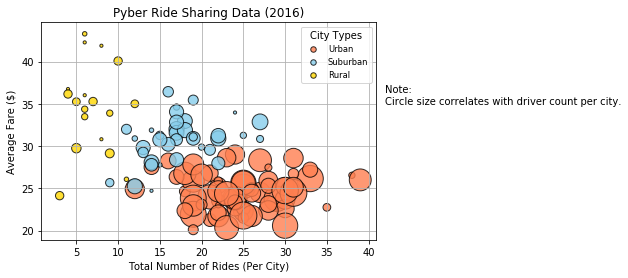

In [3]:
# Show plot
plt.show()

In [3]:
citytypes = merge_files["type"].unique()
citytypes

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
file_df = pd.DataFrame(merge_files)

In [10]:
# metrics for urban
urban_df = file_df.loc[file_df["type"] == "Urban"]
urban_rc = urban_df.groupby("city").count()["ride_id"]
urban_avg_fare = urban_df.groupby("city").mean()["fare"]
urban_dc = urban_df.groupby("city").mean()["driver_count"]

In [11]:
# metrics for suburban
suburban_df = file_df.loc[file_df["type"] == "Suburban"]
suburban_rc = suburban_df.groupby("city").count()["ride_id"]
suburban_avg_fare = suburban_df.groupby("city").mean()["fare"]
suburban_dc = suburban_df.groupby("city").mean()["driver_count"]

In [12]:
# metrics for rural
rural_df = file_df.loc[file_df["type"] == "Rural"] 
rural_rc = rural_df.groupby("city").count()["ride_id"]
rural_avg_fare = rural_df.groupby("city").mean()["fare"]
rural_dc = rural_df.groupby("city").mean()["driver_count"]

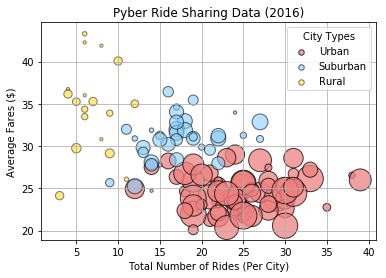

In [13]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

plt.scatter(x=urban_rc, y=urban_avg_fare, s=10*urban_dc, alpha=.75, edgecolors="black", label = "Urban", facecolors="lightcoral") 
plt.scatter(x=suburban_rc, y=suburban_avg_fare, s=10*suburban_dc, alpha=.6, edgecolors="black", label = "Suburban", facecolors="lightskyblue")
plt.scatter(x=rural_rc, y=rural_avg_fare, s=10*rural_dc, alpha=.5, edgecolors="black", label = "Rural", facecolors="gold")
lngnd=plt.legend(loc="best", title = "City Types",mode='Expanded')
lngnd.legendHandles[0]._sizes =[30]
lngnd.legendHandles[1]._sizes =[30]
lngnd.legendHandles[2]._sizes =[30]
plt.grid(True)
plt.savefig("BubblePlotOfRideSharingData.png")

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


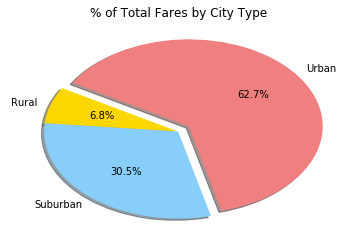

In [4]:
# Show Figure
plt.show()

In [14]:
grouped_fares = merge_files.groupby(["type"]).fare.sum()
faresum = merge_files.fare.sum()
percfares = grouped_fares / faresum * 100

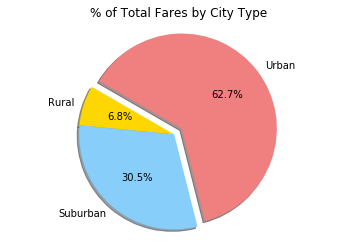

In [15]:
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.title("% of Total Fares by City Type")
plt.pie(percfares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")

plt.savefig("TotalFaresByCityType.png")

plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


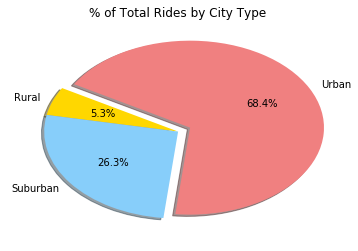

In [5]:
# Show Figure
plt.show()

In [16]:
grouped_city = merge_files.groupby(["type"]).city.count()
totalrides = merge_files.ride_id.count()
percrides = grouped_city / totalrides * 100

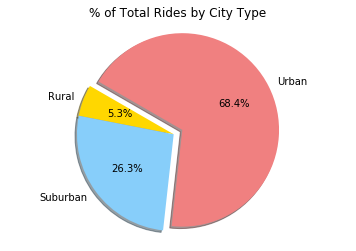

In [17]:
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(percrides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")

plt.savefig("TotalRidesByCityType.png")

plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


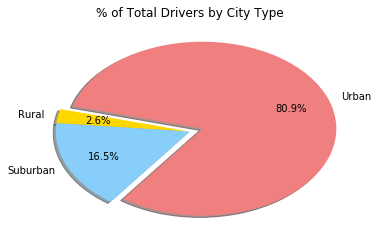

In [6]:
# Show Figure
plt.show()

In [18]:
grouped_drivers = citydata.groupby(["type"]).driver_count.sum()
totaldrivers = citydata.driver_count.sum()
driversbytype = grouped_drivers / totaldrivers

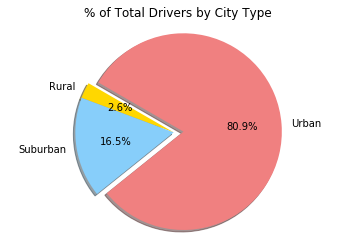

In [19]:
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(grouped_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")

plt.savefig("TotalDriversByCityType.png")

plt.show()